In [15]:
from query import query_sql_to_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if __name__ == '__main__':
    df = query_sql_to_df()
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace = True)


c:\Data Project\stock_prices_analysis\src\query.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


### Data Cleansing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2718 entries, 2014-01-02 to 2024-10-18
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tech_MSFT       2718 non-null   float64
 1   tech_GOOGL      2718 non-null   float64
 2   tech_META       2718 non-null   float64
 3   tech_NVDA       2718 non-null   float64
 4   finance_JPM     2718 non-null   float64
 5   finance_BAC     2718 non-null   float64
 6   finance_MA      2718 non-null   float64
 7   finance_V       2718 non-null   float64
 8   pharma_JNJ      2718 non-null   float64
 9   pharma_PFE      2718 non-null   float64
 10  pharma_MRK      2718 non-null   float64
 11  pharma_AZN      2718 non-null   float64
 12  food_YUM        2718 non-null   float64
 13  food_MCD        2718 non-null   float64
 14  food_SBUX       2718 non-null   float64
 15  food_DPZ        2718 non-null   float64
 16  education_UDMY  747 non-null    float64
 17  education_DUOL 

In [17]:
print(df.isna().sum())

tech_MSFT            0
tech_GOOGL           0
tech_META            0
tech_NVDA            0
finance_JPM          0
finance_BAC          0
finance_MA           0
finance_V            0
pharma_JNJ           0
pharma_PFE           0
pharma_MRK           0
pharma_AZN           0
food_YUM             0
food_MCD             0
food_SBUX            0
food_DPZ             0
education_UDMY    1971
education_DUOL    1905
education_COUR    1823
education_CHGG       0
energy_XOM           0
energy_CVX           0
energy_SHEL          0
energy_NEE           0
dtype: int64


In [18]:
df = df.fillna(0.0)

In [19]:
print(df.isna().sum())

tech_MSFT         0
tech_GOOGL        0
tech_META         0
tech_NVDA         0
finance_JPM       0
finance_BAC       0
finance_MA        0
finance_V         0
pharma_JNJ        0
pharma_PFE        0
pharma_MRK        0
pharma_AZN        0
food_YUM          0
food_MCD          0
food_SBUX         0
food_DPZ          0
education_UDMY    0
education_DUOL    0
education_COUR    0
education_CHGG    0
energy_XOM        0
energy_CVX        0
energy_SHEL       0
energy_NEE        0
dtype: int64


### Overall Trends and Price Pattern

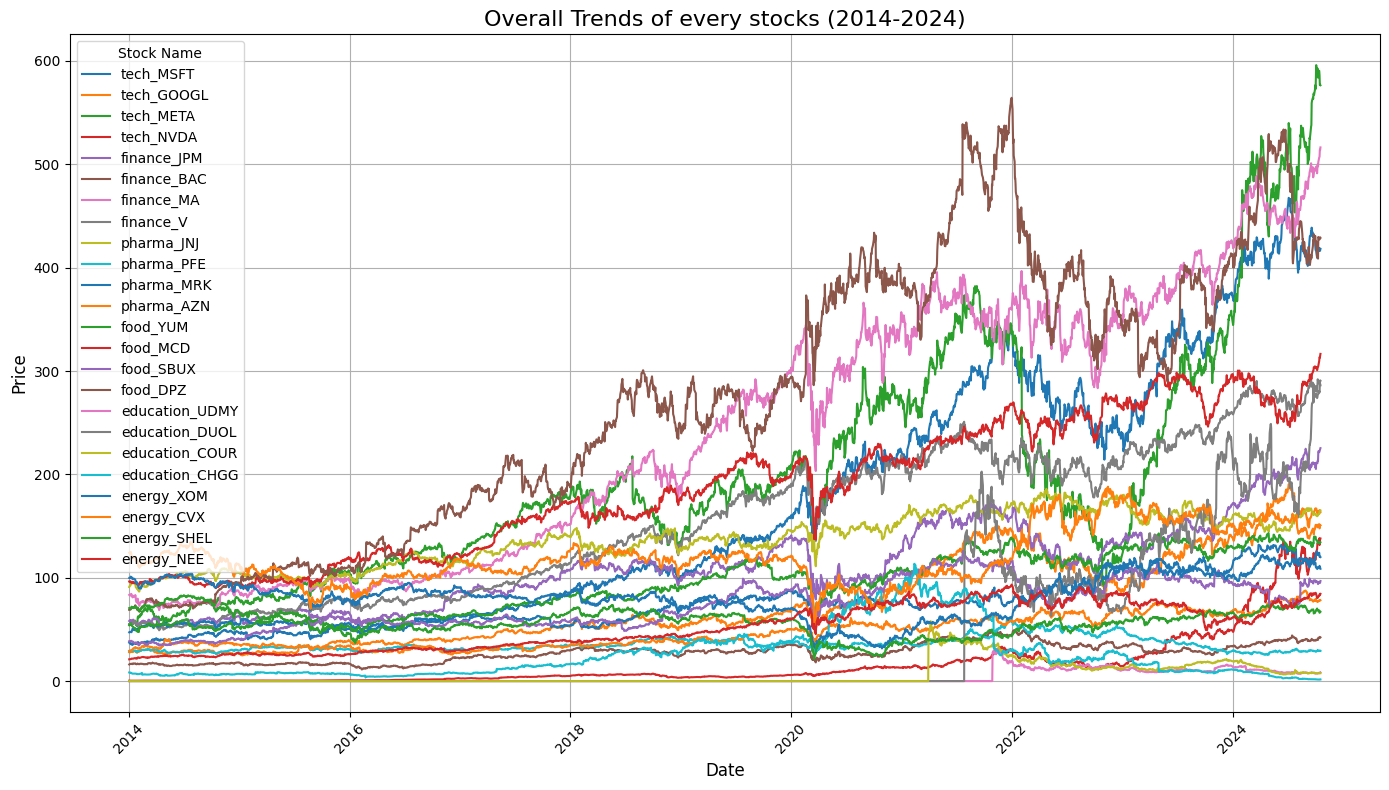

In [20]:
# Every Stock Overall Trends
def trendplot(columns: list, index: list):
    plt.figure(figsize = (14, 8))
    
    for column in columns:
        plt.plot(index, df[column], label = column)
        
    plt.title("Overall Trends of every stocks (2014-2024)", fontsize = 16)
    plt.xlabel("Date", fontsize = 12)
    plt.ylabel("Price", fontsize = 12)
    plt.legend(title = "Stock Name", loc = "best")
    plt.grid(True)
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
        
trendplot(df.columns, df.index)

C:\Users\auhro\AppData\Local\Temp\ipykernel_8012\924346386.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_indus = df.groupby(by = industry_map, axis = 1) # axis = 1 -> Columns


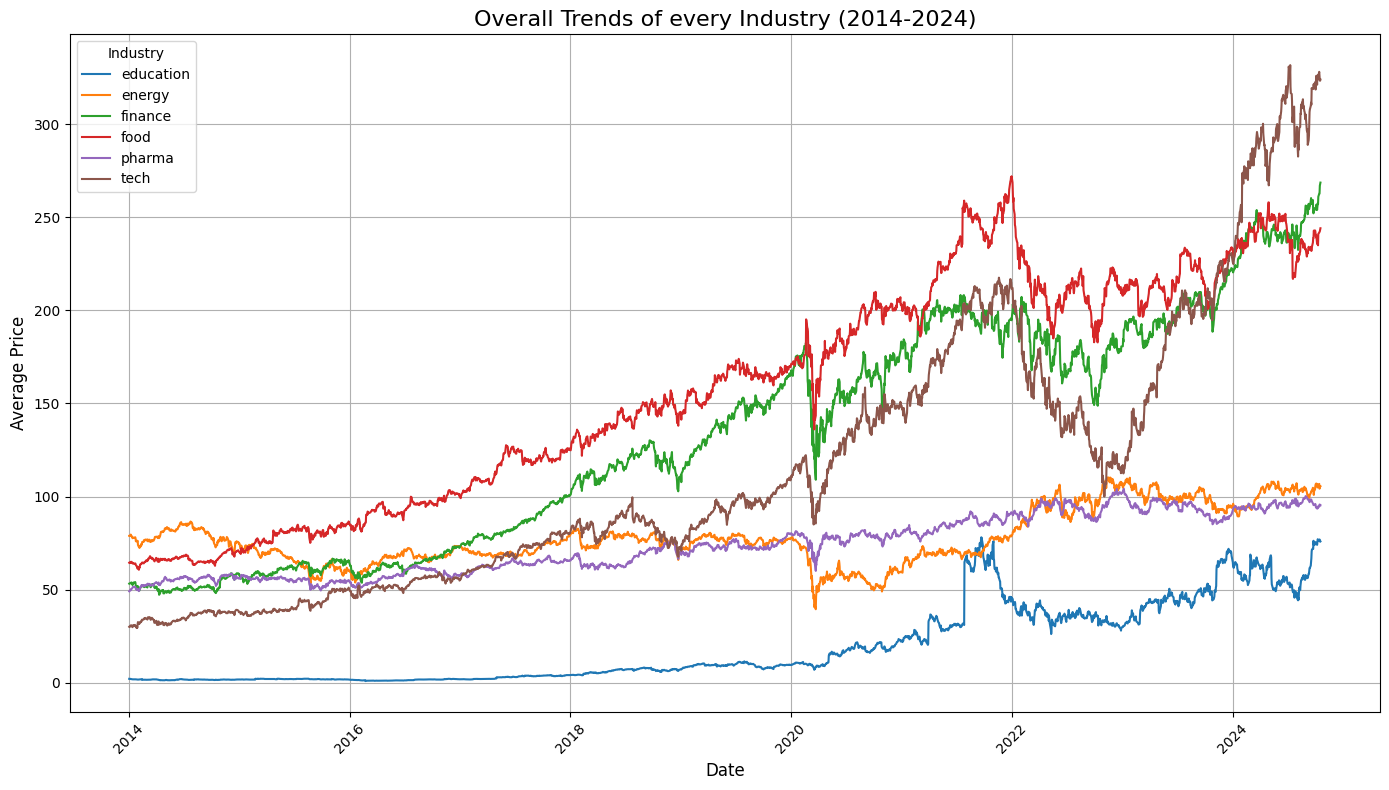

In [21]:
# Every Stock group by Industry Overall Trends
industry_map = {col: col.split("_")[0] for col in df.columns}
df_indus = df.groupby(by = industry_map, axis = 1) # axis = 1 -> Columns

def indus_mean_plot(dataframe):
    plt.figure(figsize = (14, 8))
    
    for industry, group in dataframe:
        industry_total = group.mean(axis = 1) # axis = 1 -> Take sum
        plt.plot(df.index, industry_total, label = industry)
        
    plt.title("Overall Trends of every Industry (2014-2024)", fontsize = 16)
    plt.xlabel("Date", fontsize = 12)
    plt.ylabel("Average Price", fontsize = 12)
    plt.legend(title = "Industry", loc = "upper left")
    plt.grid(True)
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
    
indus_mean_plot(df_indus)

From the both Figure of Overall Trends every stock is generally Increasing and it will shown that in period of Covid-19 pandemic of United States information from WHO COVID-19 Dashboard : https://ourworldindata.org/coronavirus the weekly confirmed dead report show that from the [8 Jan 2020 to 31 Mar 2022] are peak period of this pandemic in United States and that impact to the stock price in the figure 2 of Overall Trends of every Industry it will show the huge drop of stock price to every industry and have a lot price fluctuations after that period the stock price have trend to increasing a lot in (Tech, Finance, Food) and small increasing in (Energy, Pharma, Education)

### Volatility Analysis

In [22]:
def volatility_indus(dataframe):
    df_returns = dataframe.pct_change() # calculate the % change of each stock by day ("date" Index already)
    df_returns_indus = df_returns.groupby(by = industry_map, axis = 1)
    df_volatility = df_returns_indus.std() # calculate the volatility for each industry
    df_volatility_indus = df_volatility.mean() # average volatility for each industry
    return df_volatility_indus

df_volatility_indus = volatility_indus(df)
print(f"Volatility for each Industry: \n{df_volatility_indus}"),

Volatility for each Industry: 
education    0.025699
energy       0.009462
finance      0.007821
food         0.009266
pharma       0.008371
tech         0.011786
dtype: float64


C:\Users\auhro\AppData\Local\Temp\ipykernel_8012\3083622512.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_returns_indus = df_returns.groupby(by = industry_map, axis = 1)


(None,)

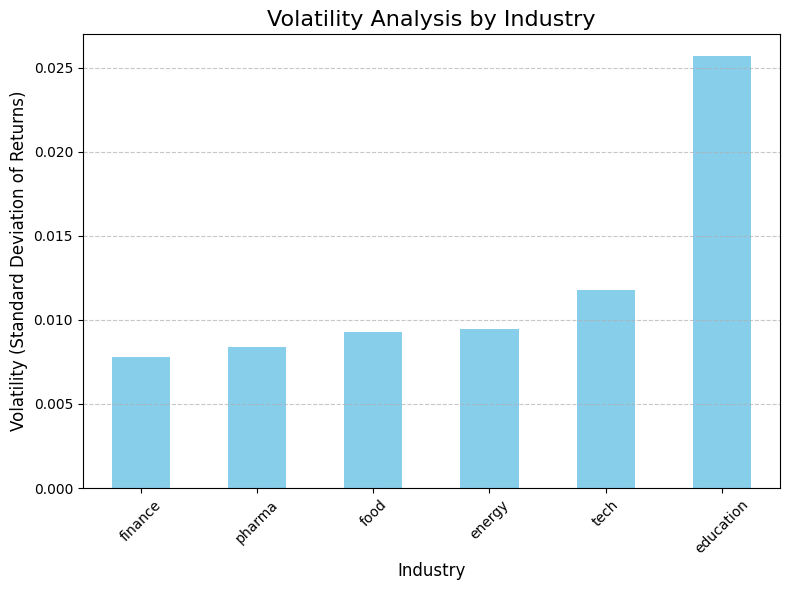

In [23]:
def volatility_plot(dataframe):
    plt.figure(figsize = (8,6))
    dataframe.sort_values().plot(kind = "bar", color = "skyblue")
    plt.title("Volatility Analysis by Industry", fontsize = 16)
    plt.xlabel("Industry", fontsize = 12)
    plt.ylabel("Volatility (Standard Deviation of Returns)", fontsize = 12)
    plt.grid(axis = "y", linestyle = "--", alpha = 0.7)
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
    
volatility_plot(df_volatility_indus)

From the output of volatility and figure abrove will show that Education Industry have highest volatility from return and that mean it may have low of ROI (Return of Investment) but it also depends on other factors.

### Returns Analysis

##### Return when Buy at January and Sell at end of the year (100 shares)

In [24]:
def calculate_yearly_return(dataframe, share: int):
    df_start_year = dataframe.resample('YE').first() # Get start year price
    df_end_year = dataframe.resample('YE').last() # Get end year price
    
    df_start_year_shifted = df_start_year.shift(1)
    
    common_years = df_start_year_shifted.index.intersection(df_end_year.index)
    
    df_start_year_shifted = df_start_year_shifted.loc[common_years]
    df_end_year = df_end_year.loc[common_years]
    
    percentage_returns = ( (df_end_year - df_start_year_shifted) / df_start_year_shifted )
    
    percentage_returns = percentage_returns.replace([float('inf'), -float('inf')], float('nan'))
    percentage_returns = percentage_returns.drop("2014-12-31")
    profit_returns = percentage_returns * share
    
    return profit_returns, percentage_returns


annual_profit, percent_returns = calculate_yearly_return(df, 100)
annual_profit
#percent_returns


,tech_MSFT,tech_GOOGL,tech_META,tech_NVDA,finance_JPM,finance_BAC,finance_MA,finance_V,pharma_JNJ,pharma_PFE,...,food_SBUX,food_DPZ,education_UDMY,education_DUOL,education_COUR,education_CHGG,energy_XOM,energy_CVX,energy_SHEL,energy_NEE
date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,49.300322,39.649276,91.299589,107.818416,13.434118,4.534159,16.719015,40.355649,12.841923,5.975049,...,55.578593,61.372202,NaN,NaN,NaN,-19.013241,-21.854640,-27.533430,-35.187544,23.311572
2016-12-31,32.891364,49.645926,46.653929,430.253340,38.086092,23.463692,20.506536,17.757150,10.227710,3.670603,...,36.345773,68.883237,NaN,NaN,NaN,5.428573,-2.768501,4.547873,-18.811588,11.969253
2017-12-31,56.094894,38.707463,72.627670,497.775732,68.091802,79.671332,59.645612,50.620874,39.052544,13.364632,...,-1.424645,72.992768,NaN,NaN,NaN,161.538466,7.978312,40.900399,45.559669,50.806221
2018-12-31,62.304245,29.325131,12.176960,30.869524,11.911039,9.365285,79.001798,65.962267,11.403666,32.272728,...,16.350503,56.598891,NaN,NaN,NaN,286.666673,-24.975242,-7.687737,5.523360,46.411730
2019-12-31,83.478770,24.802225,13.135267,18.033616,29.133856,17.792648,96.557165,64.090464,4.769087,7.519211,...,52.559425,57.152025,NaN,NaN,NaN,129.063454,-17.934847,-5.541621,-13.315698,56.141601
2020-12-31,119.956480,66.177422,101.326665,283.350479,27.952878,21.434297,88.120582,64.557628,23.193742,-10.294242,...,66.324633,57.607886,NaN,NaN,NaN,217.058626,-40.852346,-23.705850,-40.781936,81.711125
2021-12-31,109.388630,111.666729,60.334640,390.367225,12.233333,24.831657,18.435014,13.389500,17.195318,59.015588,...,30.912147,92.341523,NaN,NaN,NaN,-21.342553,-13.695349,-3.359962,-27.351858,56.499879
2022-12-31,10.165834,2.228685,-55.253962,11.442412,6.538495,10.289704,-1.069726,-4.592212,12.875395,39.201303,...,-3.782737,-8.722004,NaN,NaN,NaN,-71.063781,165.783140,111.887625,58.062733,12.638099
2023-12-31,12.334581,-3.656420,4.554848,64.410208,5.194811,-27.089654,14.977759,17.576667,-8.627719,-49.179170,...,-17.715117,-25.485334,-22.391992,115.903690,-24.158183,-63.496146,57.349704,25.071274,47.401443,-33.733363


C:\Users\auhro\AppData\Local\Temp\ipykernel_8012\3124753428.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  dataframe = dataframe.groupby(by = industry_map, axis=1).sum()


<Figure size 1600x600 with 0 Axes>

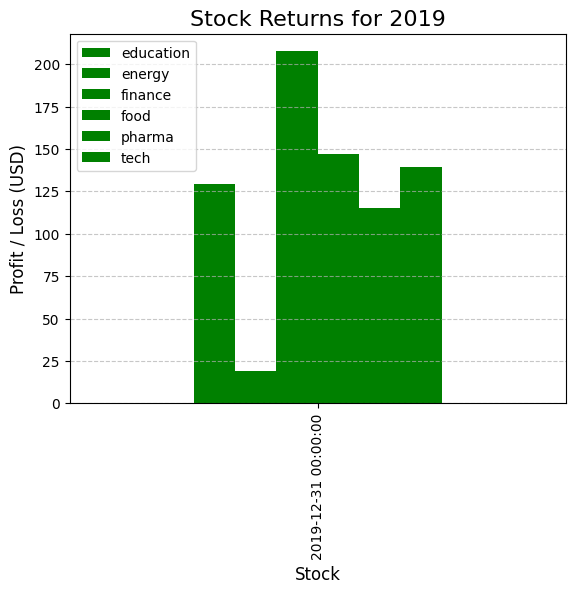

In [25]:
# Every Stock group by Industry Overall Trends

def profit_plot(dataframe, year: int):
    
    industry_map = {col: col.split("_")[0] for col in dataframe.columns}
    dataframe = dataframe.groupby(by = industry_map, axis=1).sum()
    df_year = dataframe[dataframe.index.year == year]
    
    plt.figure(figsize = (16,6))
    colors = []
    for col in df_year.columns:
        stock_returns = df_year[col]
        for r in stock_returns:
            if r >= 0:
                color = 'green'
            else: color = 'red'
        colors.append(color)
        
    df_year.plot(kind = 'bar', color = colors)
    plt.title(f"Stock Returns for {year}", fontsize=16)
    plt.xlabel("Stock", fontsize=12)
    plt.ylabel("Profit / Loss (USD)", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
profit_plot(annual_profit, 2019)

In [26]:
def top_5_stocks_by_annual_profit(dataframe):
    top_stocks ={} # Empty Dictionary
    
    # Loop for each year
    for year in dataframe.index.year.unique():
        df_year = dataframe[dataframe.index.year == year]
        sorted_stocks = df_year.sum(axis = 0).sort_values(ascending = False) # axis = 0 => sum row
        top_stocks[year] = sorted_stocks.head(5)
    return top_stocks

top_5 = top_5_stocks_by_annual_profit(annual_profit)

for year, top_stocks_year in top_5.items():
    print(f"Top 5 Stocks for {year}:")
    print(f"{top_stocks_year}\n")
    

Top 5 Stocks for 2015:
tech_NVDA    107.818416
tech_META     91.299589
food_DPZ      61.372202
food_SBUX     55.578593
tech_MSFT     49.300322
dtype: float64

Top 5 Stocks for 2016:
tech_NVDA      430.253340
food_DPZ        68.883237
tech_GOOGL      49.645926
tech_META       46.653929
finance_JPM     38.086092
dtype: float64

Top 5 Stocks for 2017:
tech_NVDA         497.775732
education_CHGG    161.538466
finance_BAC        79.671332
food_DPZ           72.992768
tech_META          72.627670
dtype: float64

Top 5 Stocks for 2018:
education_CHGG    286.666673
finance_MA         79.001798
finance_V          65.962267
tech_MSFT          62.304245
food_DPZ           56.598891
dtype: float64

Top 5 Stocks for 2019:
education_CHGG    129.063454
finance_MA         96.557165
tech_MSFT          83.478770
finance_V          64.090464
pharma_MRK         61.775161
dtype: float64

Top 5 Stocks for 2020:
tech_NVDA         283.350479
education_CHGG    217.058626
tech_MSFT         119.956480
tech_META 

As you can see for each year the interesting industry to invest is "Technology" as it come out with so much profit for each year (except some year) but from the historical of this profit result NVDA, META, GOOGL and MSFT from Technology Industry is best to invest than other but it have 1 stocks from Education Industry the DUOL that make steady increasing every year (also good to invest)

##### Return when Buy at the day and Sell at Tomorrow (100 shares)

In [27]:
def calculate_daily_return(dataframe, share: int):
  
    df_today = dataframe.shift(0) # Get Buy Day Price
    df_tomorrow = dataframe.shift(1) # Get Sell Day Price
    
    percentage_returns = ( (df_tomorrow - df_today) / df_today )
    
    percentage_returns = percentage_returns.replace([float('inf'), -float('inf')], float('nan'))
    percentage_returns = percentage_returns.drop("2014-01-02")
    profit_returns = percentage_returns * share
    
    return profit_returns, percentage_returns


daily_profit, percent_returns = calculate_daily_return(df, 100)
daily_profit
#percent_returns

,tech_MSFT,tech_GOOGL,tech_META,tech_NVDA,finance_JPM,finance_BAC,finance_MA,finance_V,pharma_JNJ,pharma_PFE,...,food_SBUX,food_DPZ,education_UDMY,education_DUOL,education_COUR,education_CHGG,energy_XOM,energy_CVX,energy_SHEL,energy_NEE
date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,0.677323,0.734842,0.274922,1.212504,-0.767134,-1.889089,0.400814,-0.067828,-0.892760,-0.196588,...,0.285902,-0.057989,NaN,NaN,NaN,1.218031,0.241180,-0.168877,-0.183664,-0.130394
2014-01-06,2.158867,-1.102636,-4.615383,-1.322420,-0.576271,-1.500600,0.498376,0.605014,-0.519878,-0.098201,...,1.024024,-0.173654,NaN,NaN,NaN,-0.605329,-0.150513,0.266088,0.668470,-0.047394
2014-01-07,-0.769016,-1.891367,-1.243089,-1.610899,1.165981,0.969696,-1.242400,-0.758427,-2.078692,-0.618086,...,-1.346977,-0.818142,NaN,NaN,NaN,0.486618,-1.395069,-0.839532,-0.860125,-0.729234
2014-01-08,1.817678,-0.207670,-0.532374,-1.344748,-0.934261,-0.482509,0.029876,-0.319506,0.138060,-0.678516,...,-1.050877,-0.157639,NaN,NaN,NaN,5.655528,0.327578,1.443750,0.724321,-0.316572
2014-01-09,0.647339,0.972358,1.765114,3.873015,0.187203,-1.485443,-0.801331,0.139695,-0.601710,0.064665,...,0.554124,-0.711440,NaN,NaN,NaN,-0.256410,0.982353,0.000000,-0.339700,-0.848635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-14,-0.672808,-1.042678,-0.079599,-2.368367,0.365720,0.095445,-0.868431,-1.011827,-0.086633,0.275103,...,0.833686,0.371432,-1.132071,0.516891,-0.132103,2.666664,-0.378789,-0.237186,0.160867,-1.266437
2024-10-15,0.095531,-0.302188,0.707859,4.916414,-0.409193,-0.545799,-0.112376,0.497685,-1.523461,-1.222828,...,-0.294612,0.191915,-0.749069,-0.801812,-0.394733,-7.975460,3.099297,2.741490,3.480623,0.144948
2024-10-16,0.629625,0.181644,1.643586,-3.035658,-0.558934,-1.542056,-1.330557,-2.862403,-0.109565,-0.775192,...,-0.439973,-0.256788,-2.197794,1.427573,2.150536,4.487183,-0.256925,-0.672359,-0.840332,-1.895957


In [29]:
def top_5_stocks_by_daily_profit(dataframe):
    top_stocks ={} # Empty Dictionary
    daily_avg_returns = dataframe.mean(axis = 0)
    sorted_stocks = daily_avg_returns.sort_values(ascending = False)
    top_stocks = sorted_stocks.head(10)
    return top_stocks

top_5 = top_5_stocks_by_daily_profit(daily_profit)

print("Top 5 Stocks to Invest in Based on Average Daily Profit:")
print(top_5)

Top 5 Stocks to Invest in Based on Average Daily Profit:
education_COUR    0.153086
education_CHGG    0.141807
education_UDMY    0.097186
energy_SHEL       0.020442
pharma_PFE        0.009841
energy_CVX        0.009757
energy_XOM        0.007921
pharma_JNJ       -0.015563
finance_BAC      -0.017203
food_SBUX        -0.019082
dtype: float64


As you can see for the 1 day trade it would be difficult to pick the stock to trade because US Stocks have high of volatility and it need the expertise to be the day trading instead of buy it for annualy profit (a lot easier to pick and more profit by the way)

### Correlation of US Stocks

##### Correlation between each Stock and Others

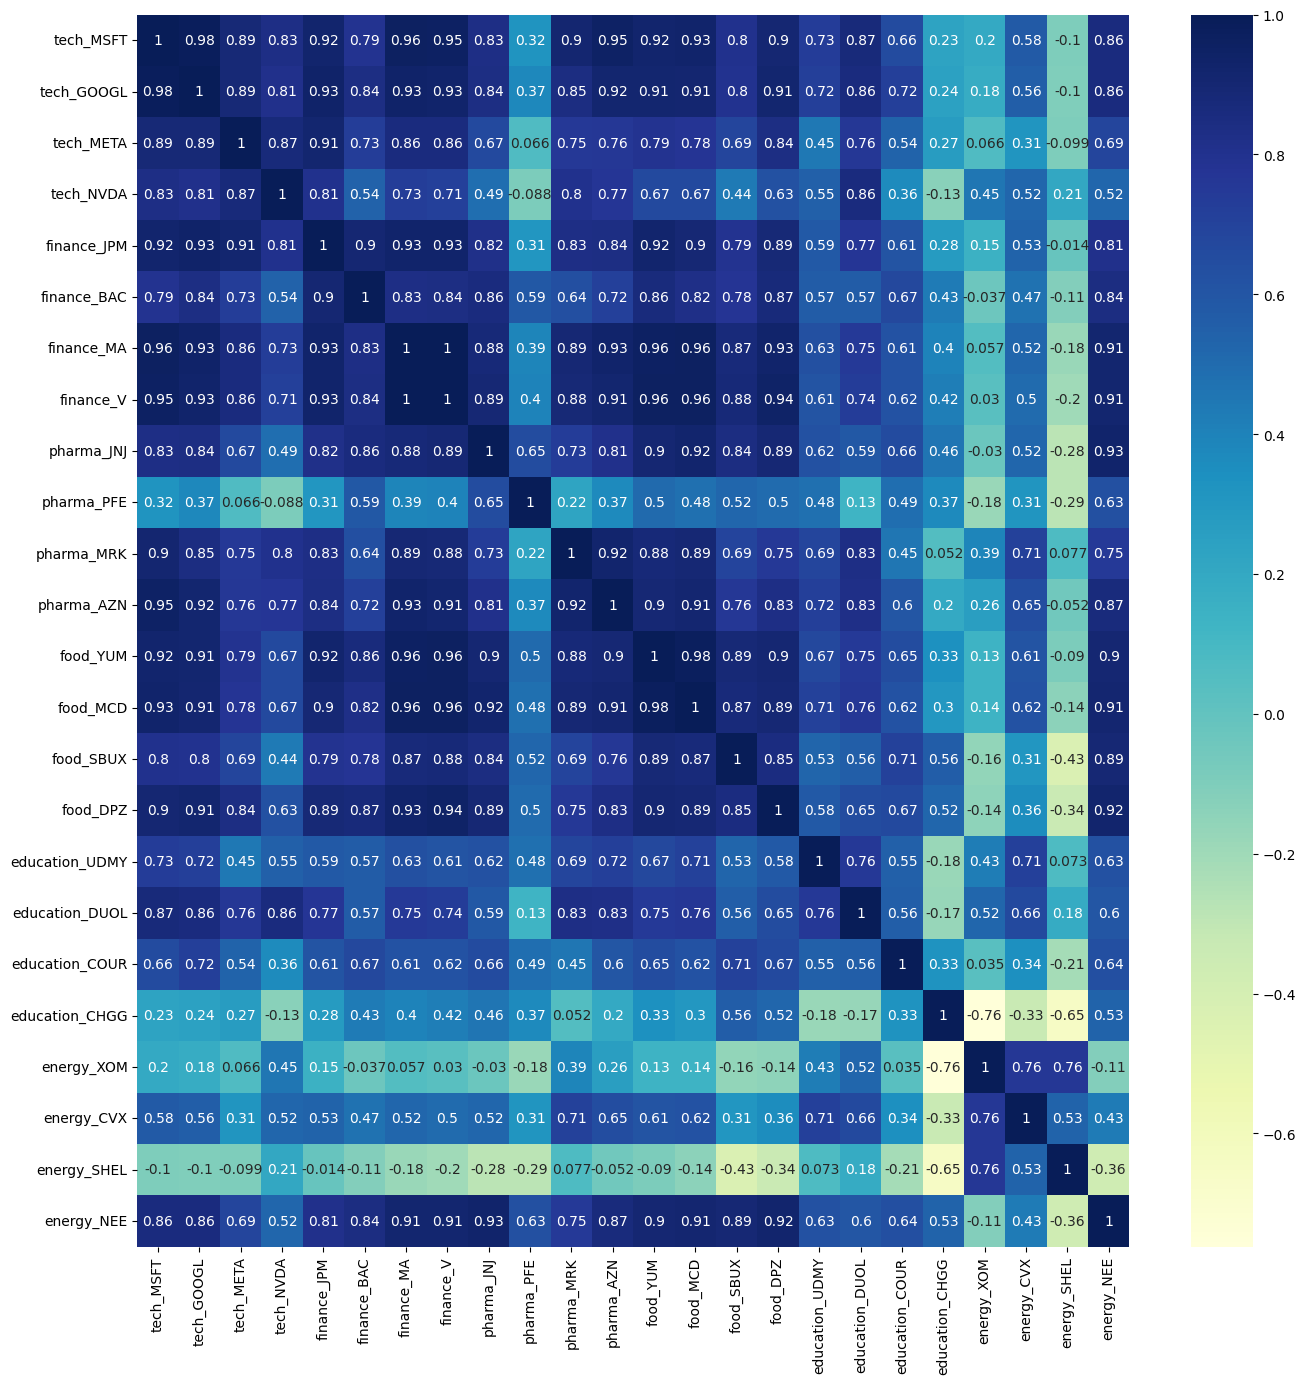

In [32]:
plt.figure(1, figsize = (16,16))
heatmap_plot = sns.heatmap(df.corr(numeric_only = True), cmap = "YlGnBu", annot = True)

From the Heatmap it can summary from some strength of correlation between some stocks as below:
1. Technology Industry & Finance Industry seem to have strong correlatio between all the stocks and as you may known the development of AI is implement in various industry. For Finance and Technology it kind similar because the Financial need to use the new technology to enhance the system and other things like Credit Analysis, Investment Advisor the cyber security and more. So that we can summarize that Tech Industry and Finance Industry will increase or decreasing with some part of each Industry
2. Correlation between Technology, Finance Industry and Energy Industry not have strong relate to both Tech, Finance it may not have relevent between these two But except 1 Energy Stock NEE that have strong correlation to the technology and financial industry it may because NEE is the energy industry that expanding on Clean Energy and for Tech Finance Industry these two focus on AI and also digitalization it might attract to the similar types of investors who seek the companies that driving these two topics
3. Education and Energy not have any strong correlation between two of it because Education and Energy not have any relevent topic and may not attract the same investor types